In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn import datasets
import tkinter as tk
import pygame
import cv2
from numpy import random


pygame 2.1.2 (SDL 2.0.18, Python 3.8.8)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [54]:
#target = pd.DataFrame(random.randint(9, size=(3)))
target = [1,1,2]

data = np.zeros((3,40000))

df = pd.DataFrame(data)
df['Target'] = target

df.head()


,0,1,2,3,4,5,6,7,8,9,...,39991,39992,39993,39994,39995,39996,39997,39998,39999,Target
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


In [55]:
# train data

pygame.init()

for i in range(0,len(target)):
    screen = pygame.display.set_mode((200, 200))
    screen.fill((0, 0, 0))
    pygame.display.set_caption("Write a digit ")

    loop = True
    while loop:
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                pygame.image.save(screen, 'num.jpg')
                loop = False
        x, y = pygame.mouse.get_pos()
        if pygame.mouse.get_pressed() == (1, 0, 0):
            pygame.draw.circle(screen, (255, 255, 255), (x, y), 10)
        pygame.display.update()
    pygame.quit()

    im = cv2.imread("num.jpg")
    im = im[:,:,1]
    out = np.reshape(im,(1,40000))
    df.iloc[i,:40000] = pd.DataFrame(out)
    

In [37]:
df.head()


,0,1,2,3,4,5,6,7,8,9,...,39991,39992,39993,39994,39995,39996,39997,39998,39999,Target
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


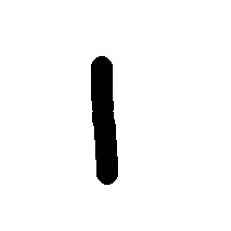

In [56]:
dummy = df.drop(columns=['Target'])
img = dummy.loc[0].values.reshape((200,200))
plt.imshow(img, cmap="Greys")
#plt.title('Training: ' + str(target[0]))
plt.axis('off')
plt.show()

In [58]:
# Support Vector Machine model

x = df.iloc[:,:40000]
y = df.iloc[:,40000]


In [59]:
svm = SVC(gamma = 0.0001 , random_state=42)

# using digits in the training set

svm.fit(x,y)

SVC(gamma=0.0001, random_state=42)

In [43]:
np.shape(x)

(3, 40000)

In [60]:
 pygame.init()

screen = pygame.display.set_mode((200, 200))
screen.fill((0, 0, 0))
pygame.display.set_caption("Write a digit ")

loop = True
while loop:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            pygame.image.save(screen, 'num.jpg')
            loop = False
    x, y = pygame.mouse.get_pos()
    if pygame.mouse.get_pressed() == (1, 0, 0):
        pygame.draw.circle(screen, (255, 255, 255), (x, y), 10)
    pygame.display.update()
pygame.quit()

im = cv2.imread("num.jpg")
im = im[:,:,1]
out = np.reshape(im,(1,40000))
data = pd.DataFrame(out)



In [61]:
# make prediction based on UI 

pred = svm.predict(data)

In [62]:
pred

array([1])